# Data visualisation, coursework 2
Author: C1840386 (@SpencerAndTheMatt)

### Small note
If you wish to skip straight to the visualisation, please run the entire script and scroll right to the bottom. I recommend running on google colab.

## Acquiring the data from GitHub

Firstly, we must acquire the data from GitHub. The link to the file is here: https://github.com/fivethirtyeight/data/blob/master/college-majors/recent-grads.csv

In [1]:
# Define imports for maths/processing/plotting
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
pd.set_option('display.max_columns', None)

In [2]:
# Acquire data from github
url = 'https://github.com/fivethirtyeight/data/blob/master/college-majors/recent-grads.csv?raw=true'
df = pd.read_csv(url)

## Initial exploratory analysis of the data

Firstly, we will conduct a quick visual inspection of the dataset

In [3]:
df.head()

,Rank,Major_code,Major,Total,Men,Women,Major_category,ShareWomen,Sample_size,Employed,Full_time,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
0,1,2419,PETROLEUM ENGINEERING,2339.0,2057.0,282.0,Engineering,0.120564,36,1976,1849,270,1207,37,0.018381,110000,95000,125000,1534,364,193
1,2,2416,MINING AND MINERAL ENGINEERING,756.0,679.0,77.0,Engineering,0.101852,7,640,556,170,388,85,0.117241,75000,55000,90000,350,257,50
2,3,2415,METALLURGICAL ENGINEERING,856.0,725.0,131.0,Engineering,0.153037,3,648,558,133,340,16,0.024096,73000,50000,105000,456,176,0
3,4,2417,NAVAL ARCHITECTURE AND MARINE ENGINEERING,1258.0,1123.0,135.0,Engineering,0.107313,16,758,1069,150,692,40,0.050125,70000,43000,80000,529,102,0
4,5,2405,CHEMICAL ENGINEERING,32260.0,21239.0,11021.0,Engineering,0.341631,289,25694,23170,5180,16697,1672,0.061098,65000,50000,75000,18314,4440,972


We will now check the data for missing values

In [6]:
# Check missing values
print('Missing values: \n', df.isna().sum())

Missing values: 
 Rank                    0
Major_code              0
Major                   0
Total                   1
Men                     1
Women                   1
Major_category          0
ShareWomen              1
Sample_size             0
Employed                0
Full_time               0
Part_time               0
Full_time_year_round    0
Unemployed              0
Unemployment_rate       0
Median                  0
P25th                   0
P75th                   0
College_jobs            0
Non_college_jobs        0
Low_wage_jobs           0
dtype: int64


A very small fraction of the data is missing - as we will be working with averages later, these can be ignored. We will now find some basic statistical information about the data.

In [7]:
# Basic statistical information about data
df.describe()

,Rank,Major_code,Total,Men,Women,ShareWomen,Sample_size,Employed,Full_time,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
count,173.000000,173.000000,172.000000,172.000000,172.000000,172.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000
mean,87.000000,3879.815029,39370.081395,16723.406977,22646.674419,0.522223,356.080925,31192.763006,26029.306358,8832.398844,19694.427746,2416.329480,0.068191,40151.445087,29501.445087,51494.219653,12322.635838,13284.497110,3859.017341
std,50.084928,1687.753140,63483.491009,28122.433474,41057.330740,0.231205,618.361022,50675.002241,42869.655092,14648.179473,33160.941514,4112.803148,0.030331,11470.181802,9166.005235,14906.279740,21299.868863,23789.655363,6944.998579
min,1.000000,1100.000000,124.000000,119.000000,0.000000,0.000000,2.000000,0.000000,111.000000,0.000000,111.000000,0.000000,0.000000,22000.000000,18500.000000,22000.000000,0.000000,0.000000,0.000000
25%,44.000000,2403.000000,4549.750000,2177.500000,1778.250000,0.336026,39.000000,3608.000000,3154.000000,1030.000000,2453.000000,304.000000,0.050306,33000.000000,24000.000000,42000.000000,1675.000000,1591.000000,340.000000
50%,87.000000,3608.000000,15104.000000,5434.000000,8386.500000,0.534024,130.000000,11797.000000,10048.000000,3299.000000,7413.000000,893.000000,0.067961,36000.000000,27000.000000,47000.000000,4390.000000,4595.000000,1231.000000
75%,130.000000,5503.000000,38909.750000,14631.000000,22553.750000,0.703299,338.000000,31433.000000,25147.000000,9948.000000,16891.000000,2393.000000,0.087557,45000.000000,33000.000000,60000.000000,14444.000000,11783.000000,3466.000000
max,173.000000,6403.000000,393735.000000,173809.000000,307087.000000,0.968954,4212.000000,307933.000000,251540.000000,115172.000000,199897.000000,28169.000000,0.177226,110000.000000,95000.000000,125000.000000,151643.000000,148395.000000,48207.000000


This tells us very little, so we instead will use a correlation coefficient

In [8]:
df.corr()

,Rank,Major_code,Total,Men,Women,ShareWomen,Sample_size,Employed,Full_time,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
Rank,1.000000,0.108429,0.071137,-0.094780,0.174913,0.643781,0.008492,0.070751,0.034725,0.193174,0.020418,0.090078,0.068900,-0.873308,-0.735688,-0.802686,0.052639,0.144689,0.202920
Major_code,0.108429,1.000000,0.196784,0.179299,0.181459,0.259211,0.206580,0.200925,0.199397,0.195184,0.205634,0.223418,0.126603,-0.176072,-0.166864,-0.094556,0.041198,0.232425,0.225294
Total,0.071137,0.196784,1.000000,0.878088,0.944764,0.142999,0.945575,0.996214,0.989339,0.950268,0.981112,0.974768,0.083192,-0.106738,-0.071926,-0.083198,0.800465,0.941247,0.935510
Men,-0.094780,0.179299,0.878088,1.000000,0.672759,-0.112014,0.875176,0.870605,0.893563,0.751592,0.892454,0.869411,0.101502,0.025991,0.038725,0.052393,0.563168,0.851500,0.791336
Women,0.174913,0.181459,0.944764,0.672759,1.000000,0.297832,0.862606,0.944037,0.917681,0.954513,0.905720,0.911694,0.059108,-0.182842,-0.137738,-0.164528,0.851946,0.872132,0.904470
ShareWomen,0.643781,0.259211,0.142999,-0.112014,0.297832,1.000000,0.097496,0.147547,0.120200,0.212290,0.112523,0.121243,0.073205,-0.618690,-0.500199,-0.586932,0.195550,0.137007,0.187850
Sample_size,0.008492,0.206580,0.945575,0.875176,0.862606,0.097496,1.000000,0.964462,0.978396,0.824824,0.985235,0.918059,0.059872,-0.067578,-0.025229,-0.055737,0.701704,0.915464,0.860319
Employed,0.070751,0.200925,0.996214,0.870605,0.944037,0.147547,0.964462,1.000000,0.995838,0.934528,0.991047,0.968900,0.068056,-0.107547,-0.067514,-0.087560,0.797534,0.941326,0.927224
Full_time,0.034725,0.199397,0.989339,0.893563,0.917681,0.120200,0.978396,0.995838,1.000000,0.900877,0.998203,0.960102,0.063349,-0.082258,-0.042957,-0.065073,0.772515,0.933124,0.904852
Part_time,0.193174,0.195184,0.950268,0.751592,0.954513,0.212290,0.824824,0.934528,0.900877,1.000000,0.880855,0.945094,0.108944,-0.190124,-0.153509,-0.158220,0.804987,0.909634,0.951593


This correlation is somewhat useful: It mainly tells us that we need to add new columns in terms of rates and percentages in order to compare. We cannot compare unemployment rate with total employed. 

The correlation cannot correlate the major category with the employment figures which is what we want to look at, so we will need another method.

Some graphs will be made using major category against median and unemployment rate. Note: These graphs will just use the first value in median / unemployment rate, rather than the average for the category. As such, they will not be wholly accurate, however they will allow a rough look at the data to see if there is a link of sorts.

Text(0, 0.5, 'USD ($)')

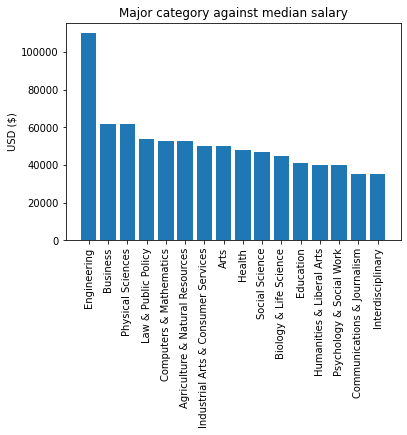

In [14]:
# Make simple graph of major category against median
plt.bar(df['Major_category'], df['Median'])
plt.xticks(rotation = 90)
plt.title('Major category against median salary')
plt.ylabel('USD ($)')

Text(0, 0.5, 'Unemployment rate (% / 100)')

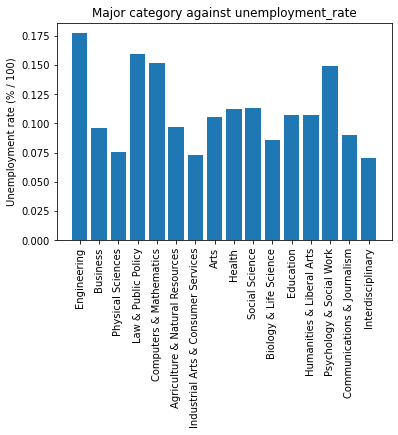

In [15]:
# Make plot of major category and unemployment rate
plt.bar(df['Major_category'], df['Unemployment_rate'])
plt.xticks(rotation = 90)
plt.title('Major category against unemployment_rate')
plt.ylabel('Unemployment rate (% / 100)')

These are hardly ideal visualisations, but they are useful to explore the link between employment rates/median salaries and degree category. They are far more useful in this aspect than the correlation coefficient.

## Processing the data

For this project, the data visualisation will show the likelihood of obtaining employment following university, dependent on the subject studied.

The visualisation will class employment as full time or part time, either requiring a degree or not, but it will not consider those with 'low wage jobs', such as hospitality, as employed, as this is completely unrelated to a degree. The visualisation will class those employed in a job that doesn't necessarily require a degree as employed, because in certain cases having a degree can make up for a potential lack of experience. This is not the case for these low wage jobs.

The visualisation will also show the median salary for a subject.

This is designed to be useful for pre-university students trying to decide upon a subject, by showing them potential future earnings along with employment rates via degree. It is not meant to shoehorn people into certain degrees, but rather allow them to see that their chosen degree will not necessarily increase their employability/earnings compared to not holding a degree in a certain industry.

For the processing, we are only looking at specific columns. A list of the column(s) to keep is as follows:
- Major: The subject studied at university
- Major_category: The category the subjects falls under
- Median: The median salary earnings for the particular subject

We must also construct new column(s) for the analysis. The new columns to be formed are seen below:
- Employment_rate_college_jobs : This is the employment rate but only for those employed in jobs requiring a college degree.
- Employment_rate_non_college_jobs : This is the employment rate but only for those employed in jobs not requiring a college degree.
- Employment_rate_low_wage : This is the employment rate but only for those employed in low wage jobs.


In [16]:
'''

NOTE
DISCREPANCY DETECTED
Unemployed + Employed /= Total, weirdly
Doing the employment rates with unemployed and employed as total leads to percentages 
much greater than 100% for employment (It isn't a rounding issue as some of 
the percentages total to ~ 120%)

To fix this, the mean between total and (unemployed + employed) will be used

It is not known how total is calculated, hence this is the best solution we 
can do in this case

'''


# Add amountof Jobseekers as the total amount of working age population who are able to work
total_jobseekers = []
for i in range(len(df['Total'])):
  total_jobseekers.append(np.mean([df['Employed'][i] + df['Unemployed'][i], df['Total'][i]]))

df['Jobseekers'] = total_jobseekers

# Add employment_rate_college_jobs to df
employment_rate_college_jobs = []
for i in range(len(df['Total'])):
  employment_rate_college_jobs.append(df['College_jobs'][i] / df['Jobseekers'][i])

df['Employment_rate_college_jobs'] = employment_rate_college_jobs

# Add employment_rate_non_college_jobs to df
employment_rate_non_college_jobs = []
for i in range(len(df['Total'])):
  employment_rate_non_college_jobs.append(df['Non_college_jobs'][i] / df['Jobseekers'][i])

df['Employment_rate_non_college_jobs'] = employment_rate_non_college_jobs

# Add employment_rate_low_wage
employment_rate_low_wage = []
for i in range(len(df['Total'])):
  employment_rate_low_wage.append(df['Low_wage_jobs'][i] / df['Jobseekers'][i])

df['Employment_rate_low_wage'] = employment_rate_low_wage

df

,Rank,Major_code,Major,Total,Men,Women,Major_category,ShareWomen,Sample_size,Employed,Full_time,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs,Jobseekers,Employment_rate_college_jobs,Employment_rate_non_college_jobs,Employment_rate_low_wage
0,1,2419,PETROLEUM ENGINEERING,2339.0,2057.0,282.0,Engineering,0.120564,36,1976,1849,270,1207,37,0.018381,110000,95000,125000,1534,364,193,2176.0,0.704963,0.167279,0.088695
1,2,2416,MINING AND MINERAL ENGINEERING,756.0,679.0,77.0,Engineering,0.101852,7,640,556,170,388,85,0.117241,75000,55000,90000,350,257,50,740.5,0.472654,0.347063,0.067522
2,3,2415,METALLURGICAL ENGINEERING,856.0,725.0,131.0,Engineering,0.153037,3,648,558,133,340,16,0.024096,73000,50000,105000,456,176,0,760.0,0.600000,0.231579,0.000000
3,4,2417,NAVAL ARCHITECTURE AND MARINE ENGINEERING,1258.0,1123.0,135.0,Engineering,0.107313,16,758,1069,150,692,40,0.050125,70000,43000,80000,529,102,0,1028.0,0.514591,0.099222,0.000000
4,5,2405,CHEMICAL ENGINEERING,32260.0,21239.0,11021.0,Engineering,0.341631,289,25694,23170,5180,16697,1672,0.061098,65000,50000,75000,18314,4440,972,29813.0,0.614296,0.148928,0.032603
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
168,169,3609,ZOOLOGY,8409.0,3050.0,5359.0,Biology & Life Science,0.637293,47,6259,5043,2190,3602,304,0.046320,26000,20000,39000,2771,2947,743,7486.0,0.370158,0.393668,0.099252
169,170,5201,EDUCATIONAL PSYCHOLOGY,2854.0,522.0,2332.0,Psychology & Social Work,0.817099,7,2125,1848,572,1211,148,0.065112,25000,24000,34000,1488,615,82,2563.5,0.580456,0.239906,0.031988
170,171,5202,CLINICAL PSYCHOLOGY,2838.0,568.0,2270.0,Psychology & Social Work,0.799859,13,2101,1724,648,1293,368,0.149048,25000,25000,40000,986,870,622,2653.5,0.371585,0.327869,0.234407
171,172,5203,COUNSELING PSYCHOLOGY,4626.0,931.0,3695.0,Psychology & Social Work,0.798746,21,3777,3154,965,2738,214,0.053621,23400,19200,26000,2403,1245,308,4308.5,0.557735,0.288964,0.071487


We are only interested in the employment data for this visualisation, so we will take the necessary data from the original dataframe (df) and put it into a new one called employment_data.

In [17]:
# Get all employment stats based on major category into single dataframe
employment = df.groupby('Major_category')


avg_college_emp = pd.DataFrame((employment['Employment_rate_college_jobs']).mean()).reset_index()
avg_non_college_emp = pd.DataFrame((employment['Employment_rate_non_college_jobs']).mean()).reset_index()
avg_low_wage_emp = pd.DataFrame((employment['Employment_rate_low_wage']).mean()).reset_index()

# Make holder columns for data
employment_data = pd.DataFrame()
employment_data['Major_category'] = pd.unique(df['Major_category'])
employment_data['College_employed'] = np.zeros(len(employment_data['Major_category']))
employment_data['Non_college_employed'] = np.zeros(len(employment_data['Major_category']))
employment_data['Low_wage_employed'] = np.zeros(len(employment_data['Major_category']))

# Enter data into columns
for i in range(len(avg_college_emp['Major_category'])):
  for j in range(len(employment_data['Major_category'])):
    if avg_college_emp['Major_category'][i] == employment_data['Major_category'][j]:
      employment_data['College_employed'][j] = avg_college_emp['Employment_rate_college_jobs'][i]
      employment_data['Non_college_employed'][j] = avg_non_college_emp['Employment_rate_non_college_jobs'][i]
      employment_data['Low_wage_employed'][j] = avg_low_wage_emp['Employment_rate_low_wage'][i]

# Form total column for understanding of rates
total = []
for i in range(len(employment_data['Major_category'])):
  total.append(np.sum([employment_data['College_employed'][i], employment_data['Non_college_employed'][i], employment_data['Low_wage_employed'][i]]))

employment_data['Total'] = total

employment_data

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,Major_category,College_employed,Non_college_employed,Low_wage_employed,Total
0,Engineering,0.516245,0.239119,0.054986,0.810351
1,Business,0.163987,0.377546,0.096856,0.638389
2,Physical Sciences,0.418002,0.363800,0.101281,0.883083
3,Law & Public Policy,0.234059,0.485571,0.106134,0.825764
4,Computers & Mathematics,0.458559,0.295359,0.063340,0.817258
5,Agriculture & Natural Resources,0.300954,0.431125,0.080788,0.812867
6,Industrial Arts & Consumer Services,0.183283,0.446125,0.096646,0.726053
7,Arts,0.250265,0.513632,0.194155,0.958052
8,Health,0.406884,0.369000,0.100992,0.876876
9,Social Science,0.253120,0.426990,0.124750,0.804860


In [18]:
# Add median salary data to employment_data
average_salary = (employment['Median'].mean()).reset_index()

employment_data['Median_salary'] = np.zeros(len(employment_data['Major_category']))

for i in range(len(average_salary['Major_category'])):
  for j in range(len(employment_data['Major_category'])):
    if average_salary['Major_category'][i] == employment_data['Major_category'][j]:
      employment_data['Median_salary'][j] = average_salary['Median'][i]



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


All the figures are now in the dataframe. We will now make a new dataframe with clearer columns and with digits rounded to two significant figures. The decimal values will also be put in terms of percentages.

In [19]:
# Round float variables to 3 significant figures within the DataFrames for readibility 
def sig_figs(figure): # Function to round a number to two signifant figures
  return float('%.2g' % figure)
  
# Construct new data frame to hold new values
data = pd.DataFrame()

# Put necessary data in 'data' dataframe
data['Major Category'] = employment_data['Major_category']
data['College Degree Required'] = employment_data['College_employed'].apply(sig_figs).apply(lambda x: x * 100)
data['No College Degree Required'] = employment_data['Non_college_employed'].apply(sig_figs).apply(lambda x: x * 100)
data['Low Wage Job'] = employment_data['Low_wage_employed'].apply(sig_figs).apply(lambda x: x * 100)
data['Median Salary'] = employment_data['Median_salary'].apply(sig_figs)

# Visual inspection of new data dataframe
data

,Major Category,College Degree Required,No College Degree Required,Low Wage Job,Median Salary
0,Engineering,52.0,24.0,5.5,57000.0
1,Business,16.0,38.0,9.7,44000.0
2,Physical Sciences,42.0,36.0,10.0,42000.0
3,Law & Public Policy,23.0,49.0,11.0,42000.0
4,Computers & Mathematics,46.0,30.0,6.3,43000.0
5,Agriculture & Natural Resources,30.0,43.0,8.1,37000.0
6,Industrial Arts & Consumer Services,18.0,45.0,9.7,36000.0
7,Arts,25.0,51.0,19.0,33000.0
8,Health,41.0,37.0,10.0,37000.0
9,Social Science,25.0,43.0,12.0,37000.0


## Visualising the data

The data is now processed with information for salary and employment by major category (Where major refers to subject studied)

We can now begin the visualisation

In [20]:
# Import plotting tools
import plotly.express as px
import plotly.graph_objects as go

In [21]:
# Inspect data briefly
data

,Major Category,College Degree Required,No College Degree Required,Low Wage Job,Median Salary
0,Engineering,52.0,24.0,5.5,57000.0
1,Business,16.0,38.0,9.7,44000.0
2,Physical Sciences,42.0,36.0,10.0,42000.0
3,Law & Public Policy,23.0,49.0,11.0,42000.0
4,Computers & Mathematics,46.0,30.0,6.3,43000.0
5,Agriculture & Natural Resources,30.0,43.0,8.1,37000.0
6,Industrial Arts & Consumer Services,18.0,45.0,9.7,36000.0
7,Arts,25.0,51.0,19.0,33000.0
8,Health,41.0,37.0,10.0,37000.0
9,Social Science,25.0,43.0,12.0,37000.0


The below code section will create the interactive visualisations.

In [22]:
# Create figure
fig = go.Figure(
    layout_title_text = 'Mean Employment (%) and Median Salary (USD) based on Major Category (Age < 28)',
)

# Create data to show average salary and average employment (USA)
salary_USA = np.ones(len(data['Major Category'])) * 45663 # Source: https://dqydj.com/average-median-top-salary-by-age-percentiles/
employment_USA = np.ones(len(data['Major Category'])) * 73.5 # Source: https://www.statista.com/statistics/217899/us-employment-rate-by-age/

'''
Small note about the sources used - The data used in this script is for under 28s.
For the salary information, the mean salary for the age 25 has been used.
For the employment information, the mean unemployment for the ages 25 - 29 has been used.
'''


# Add employment rate traces
fig.add_trace(
    go.Bar( # Employment rate, College jobs
           x = data['Major Category'],
           y = data['College Degree Required'],
           offsetgroup = 0,
           name = 'College Degree Required (%)',
           visible = True,
           marker_color = 'indianred'
    )
)

fig.add_trace(
    go.Bar( # Employment rate, Non College Jobs
        x = data['Major Category'],
        y = data['No College Degree Required'],
        offsetgroup = 0,
        name = 'No College Degree Required (%)',
        visible = True,
        marker_color = 'lightslategray'
    )
)

fig.add_trace(
    go.Bar( # Employment rate, Low Wage Jobs
        x = data['Major Category'],
        y = data['Low Wage Job'],
        offsetgroup = 0,
        name = 'Low Wage Job (%)',
        visible = True
    )
)
    
# Add salary trace
fig.add_trace(
    go.Bar( # Median salary trace
        x = data['Major Category'],
        y = data['Median Salary'],
        name = 'Median Salary (USD)',
        visible = False,
        marker_color = 'indianred'
    )
)

# Plot average salary and average employment rate
fig.add_trace(
    go.Line(
        x = data['Major Category'],
        y = employment_USA,
        name = 'Average employment (%)',
        visible = True,
        hoverinfo = 'skip',
        marker_color = 'purple'
    )
)

fig.add_trace(
    go.Line(
        x = data['Major Category'],
        y = salary_USA,
        name = 'Average salary (USD)',
        visible = False,
        hoverinfo = 'skip',
        marker_color = 'purple'
    )
)

# Make dropdown able to show different data
fig.update_layout(

    # Update menus
    updatemenus = [go.layout.Updatemenu(
        
        # Format positional and aesthetic info of button
        active = 0,
        type = 'buttons', 
        x = 1,
        y = 0.5,
        xanchor = 'left',
        yanchor = 'top',

        # Decide what the buttons actually do when clicked
        buttons = list(
            [
             # Show employment
             dict(label = 'Mean Employment (%)', 
                  method = 'restyle',

                  # --------------------------------------------------------- #
                  #Note: With the 'args', inside 'visible', we see a bunch of 
                  #Bools. These refer to the order that the traces were added 
                  #to the graph. There are 6 traces, first 3 being employment.
                  #I.e to show employment data and nothing else, visible : 
                  #[True, True, True, False elsewhere] is used.
                  # --------------------------------------------------------- #

                  args = [{'visible' : [True, True, True, False, True, False]},
                          {'title' : 'Mean Employment (%)',
                           'showlegend' : True,
                           }]),
             
             # Show salary
             dict(label = 'Median Salary (USD)', 
                  method = 'restyle',
                  args = [{'visible': [False, False, False, True, False, True]}, 
                          {'title' : 'Median Salary (USD)',
                           'showlegend' : True}]),
            ])
        )
    ])

# Make the bars stacked and change x label rotation
fig.update_layout(barmode = 'stack', xaxis_tickangle = -45)

# Show figure
fig.show()

/usr/local/lib/python3.7/dist-packages/plotly/graph_objs/_deprecations.py:385: DeprecationWarning:

plotly.graph_objs.Line is deprecated.
Please replace it with one of the following more specific types
  - plotly.graph_objs.scatter.Line
  - plotly.graph_objs.layout.shape.Line
  - etc.




The result of the visualisation is above.